In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.random([5])

array([0.27618833, 0.67871182, 0.00678423, 0.9268857 , 0.5970892 ])

In [3]:
def get_laplace_sample(n):
    rand_uniform = np.random.random([n])
    def map_back(r):
        if r >= 1/2:
            res = -np.log(2 * (1 - r))
        else:
            res = np.log(2 * r)
        return res
    v_map_back = np.vectorize(map_back)
    res = v_map_back(rand_uniform)
    return res

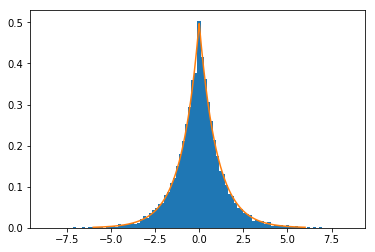

In [4]:
plt.hist(get_laplace_sample(10000), bins=100, density=True)
x = np.linspace(-6, 6, 1000)
y = [1/2 * np.exp(-np.abs(i)) for i in x]
plt.plot(x, y)
plt.savefig("./Laplace")

In [5]:
def sample_normal_from_laplace(n):
    res = np.empty(shape=0)
    def acc_prob(x):
        return np.exp(-1/2 * (np.abs(x) - 1) * (np.abs(x) - 1))
    v_acc_prob = np.vectorize(acc_prob)
    while len(res) < n:
        sample_laplace = get_laplace_sample(n)
        accept_prob = v_acc_prob(sample_laplace)
        accept_idx = np.random.binomial(1, accept_prob) == 1
        res = np.append(res, sample_laplace[accept_idx])
    return res[:n]

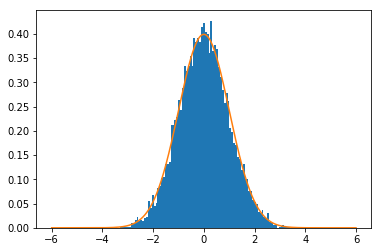

In [6]:
plt.hist(sample_normal_from_laplace(10000), bins=100, density=True)
x = np.linspace(-6, 6, 1000)
y = [1/np.sqrt(2 * np.pi) * np.exp(-i * i / 2) for i in x]
plt.plot(x, y)
plt.savefig("./Gaussian")